In [1]:
%pylab inline
import sklearn


Populating the interactive namespace from numpy and matplotlib


In [2]:
# generate data
from sklearn.datasets.samples_generator import make_blobs
data = make_blobs(n_samples=100, n_features=2, centers=3,cluster_std=2.5)[0]

In [3]:
# compute centers
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(data)
[center_1, center_2, center_3] = km.cluster_centers_

In [4]:
# compute distance from each data point to closest center:
distance = [(min(distances),i) for i,distances in enumerate(km.transform(data))]

In [9]:
distance

[(3.3168748569064475, 0),
 (2.646188793605337, 1),
 (3.2176209997019196, 2),
 (3.1765706170509147, 3),
 (1.9055788598036432, 4),
 (2.862135445144844, 5),
 (2.144080268068899, 6),
 (2.3358976929479986, 7),
 (2.1946818601975777, 8),
 (1.234954917200617, 9),
 (4.441324826433396, 10),
 (1.827176650953981, 11),
 (3.1486430101329606, 12),
 (2.5161689932149254, 13),
 (1.810128500117997, 14),
 (4.561216514176771, 15),
 (3.634205736500515, 16),
 (1.9478859718973043, 17),
 (3.136266296754717, 18),
 (2.7985710212740234, 19),
 (2.2026875367853416, 20),
 (1.3244220655694336, 21),
 (5.8680519537172655, 22),
 (0.9335790917924685, 23),
 (1.6697659912009095, 24),
 (2.810438613641615, 25),
 (2.7721849712390085, 26),
 (1.402491650157118, 27),
 (3.1525111691865377, 28),
 (2.6934179757346373, 29),
 (2.1794152527076136, 30),
 (0.542702622349761, 31),
 (4.733045856849756, 32),
 (2.7091734463494315, 33),
 (3.250628143559158, 34),
 (6.528988990114102, 35),
 (1.8638826248769373, 36),
 (4.219427663605462, 37),
 

In [5]:
# pick the top 10 outliers
indices_of_outliers = [row[1] for row in sorted(distance, key=lambda row: row[0], reverse=True)[:10]]

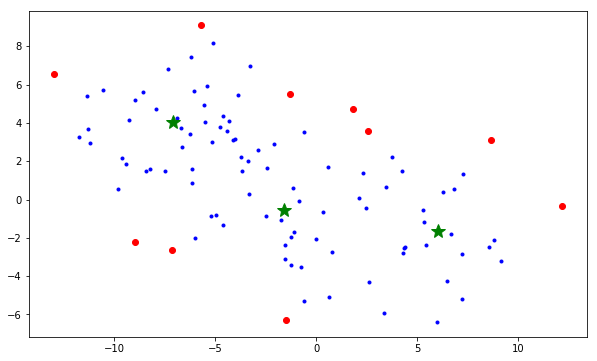

In [8]:
figure(1,figsize=(10,6))
plot([row[0] for row in data],[row[1] for row in data],'b.')
plot(center_1[0],center_1[1], 'g*',ms=15)
plot(center_2[0],center_2[1], 'g*',ms=15)
plot(center_3[0],center_3[1], 'g*',ms=15)
# mark outliers by drawing a circle on top of the already-present point:
# plot([row[0] for row in data],[row[1] for row in data],'ro')
for i in indices_of_outliers:
    [x,y] = data[i]
    plot(x,y,'ro')